# Fit AdapIF to HH Spike Trains

In [1]:
from brian2 import *
from brian2modelfitting import *

import numpy as np

INFO       Cache size for target "cython": 1125 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/alteska/.cython/brian_extensions" directory. [brian2]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyte

In [2]:
dt = 0.01*ms
defaultclock.dt = dt

## Load the Data

In [3]:
voltage1 = genfromtxt('voltage1nA.csv', delimiter=',')
voltage2 = genfromtxt('voltage2nA.csv', delimiter=',')

In [4]:
inp_cur1 = genfromtxt('inp_cur1nA.csv', delimiter=',')
inp_cur2 = genfromtxt('inp_cur2nA.csv', delimiter=',')
inp_current = [inp_cur1, inp_cur2]
inp_current

[array([ 0.        , -0.01416314,  0.06263459, ..., -0.44478035,
        -0.39163954, -0.33014548]),
 array([ 0.        ,  0.39594954,  0.27878635, ..., -0.55344109,
        -0.71057181, -0.62256885])]

In [5]:
out_spikes1 = genfromtxt('out_spikes1nA.csv', delimiter=',')
out_spikes2 = genfromtxt('out_spikes2nA.csv', delimiter=',')
out_spikes = [out_spikes1, out_spikes2]
out_spikes

[array([1.085000e+01, 8.677000e+01, 1.528700e+02, 1.779900e+02,
        2.064900e+02, 2.554600e+02, 2.899700e+02, 3.515700e+02,
        3.724500e+02, 4.118800e+02, 5.016400e+02, 5.142600e+02,
        5.692000e+02, 5.882600e+02, 6.173700e+02, 6.599100e+02,
        7.055700e+02, 7.967000e+02, 9.689300e+02, 1.029320e+03,
        1.179850e+03, 1.201260e+03, 1.277750e+03, 1.314760e+03,
        1.374470e+03, 1.408510e+03, 1.422030e+03, 1.462080e+03,
        1.485980e+03, 1.514330e+03, 1.597820e+03, 1.717750e+03,
        1.744830e+03, 1.814920e+03, 1.943690e+03, 1.985120e+03,
        2.178470e+03, 2.198500e+03, 2.217570e+03, 2.345900e+03,
        2.418410e+03, 2.427140e+03, 2.450770e+03, 2.650410e+03,
        2.686330e+03, 2.729710e+03, 2.792290e+03, 2.818290e+03,
        2.859090e+03, 2.884830e+03, 2.922460e+03, 2.975510e+03,
        2.988590e+03, 3.105040e+03, 3.144640e+03, 3.182180e+03,
        3.243690e+03, 3.310540e+03, 3.468030e+03, 3.591240e+03,
        3.698810e+03, 3.720380e+03, 3.76

## Model Fitting

In [6]:
# tau = 12.44*ms
# taut = 97.64*ms
# a = 0.21
# alpha = 7.2*mV
# R = 76*Mohm

model = '''
        dv/dt = (R*I- v)/tau :volt
        dvt/dt = (a*v - vt) / taut :volt
        alpha : volt (constant)
        a : 1 (constant)
        R : ohm (constant)
        tau : second (constant)
        taut : second (constant)
        '''
reset = '''
v = 0*mV
vt = vt + alpha
'''

In [7]:
n_opt = NevergradOptimizer()
metric = GammaFactor(time=50*second, delta=2*ms)

In [8]:
fitter = SpikeFitter(model=model, input_var='I', dt=dt,
                     input=inp_current * nA, output=out_spikes,
                     n_samples=100,
                     threshold='v > vt',
                     reset=reset,
                     refractory=1.4*ms,
                     )

In [9]:
result_dict, error = fitter.fit(n_rounds=10,
                                optimizer=n_opt,
                                metric=metric,
                                callback='text',
                                alpha=[5,10]*mV,
                                a = [0.1, 1],
                                R = [1, 100]*Mohm, 
                                tau = [10, 13]*ms,
                                taut = [90, 100]*ms,
                               )

Round 0: fit (0.838583181199918, 0.007959648959419398, 0.09401202259047671, 0.012132778902136685, 55920654.92819043) with error: 0.056560581102233734
Round 1: fit (0.8900691445100393, 0.00846325451016394, 0.09176836576567504, 0.011182562474353291, 51867398.9378374) with error: 0.05367831436425931
Round 2: fit (0.9490919281236277, 0.008587294019291904, 0.09122701707011413, 0.011907337634661938, 55262625.7415524) with error: 0.04527582032371337
Round 3: fit (0.9387784268083285, 0.008075125831204927, 0.09148495818379773, 0.011186520992112377, 49991955.50593145) with error: 0.03666103228800005
Round 4: fit (0.9387784268083285, 0.008075125831204927, 0.09148495818379773, 0.011186520992112377, 49991955.50593145) with error: 0.03666103228800005
Round 5: fit (0.9387784268083285, 0.008075125831204927, 0.09148495818379773, 0.011186520992112377, 49991955.50593145) with error: 0.03666103228800005
Round 6: fit (0.9387784268083285, 0.008075125831204927, 0.09148495818379773, 0.011186520992112377, 4999

In [10]:
result_dict

{'a': 0.9570727930256027,
 'alpha': 0.007997655283756979,
 'taut': 0.09130054085026328,
 'tau': 0.011314096112488898,
 'R': 49837806.242087}

In [11]:
error

0.03242073122725385

In [12]:
1 - error

0.9675792687727461

In [13]:
# visualization of the results
spikes = fitter.generate_spikes(params=None)
print('spike times:', spikes)

spike times: [array([1.400000e+01, 1.540000e+01, 8.042000e+01, ..., 4.991630e+04,
       4.998874e+04, 4.999285e+04]), array([1.838000e+01, 1.978000e+01, 2.118000e+01, ..., 4.992374e+04,
       4.992713e+04, 4.996423e+04])]


In [14]:
print(len(out_spikes[0]))
print(len(spikes[0]))

918
1014


In [19]:
print(len(out_spikes[1]))
print(len(spikes[1]))

1505
1688


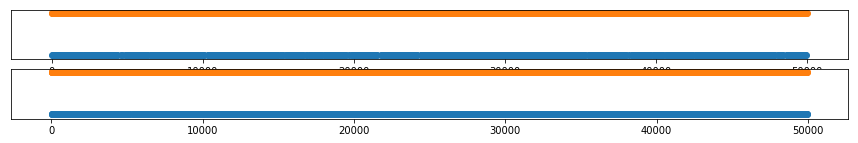

In [15]:
d=-1

fig, ax = plt.subplots(nrows=2, figsize=(15,2))

ax[0].set_yticks(np.arange(0, 1, step=1))
ax[0].scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
ax[0].scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

ax[1].set_yticks(np.arange(0, 1, step=1))
ax[1].scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
ax[1].scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);

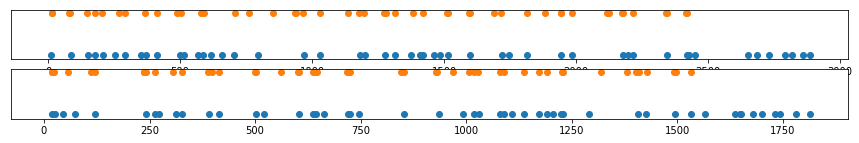

In [20]:
d=50

fig, ax = plt.subplots(nrows=2, figsize=(15,2))

ax[0].set_yticks(np.arange(0, 1, step=1))
ax[0].scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
ax[0].scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

ax[1].set_yticks(np.arange(0, 1, step=1))
ax[1].scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
ax[1].scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);

In [17]:
fits = fitter.generate(params=None, output_var='v',)

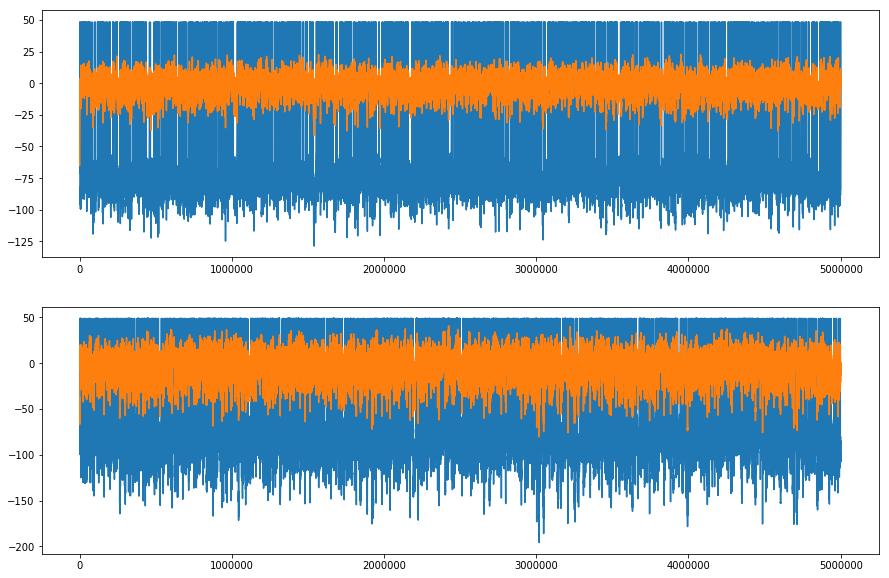

In [18]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))

ax[0].plot(voltage1);
ax[0].plot(fits[0]/mV)

ax[1].plot(voltage2);
ax[1].plot(fits[1]/mV);


In [22]:
t0 = np.arange(0, len(voltage1)*dt, dt)
t_ = out_spikes[0]
t = out_spikes[0][t_<2000]

In [23]:
t

array([  10.85,   86.77,  152.87,  177.99,  206.49,  255.46,  289.97,
        351.57,  372.45,  411.88,  501.64,  514.26,  569.2 ,  588.26,
        617.37,  659.91,  705.57,  796.7 ,  968.93, 1029.32, 1179.85,
       1201.26, 1277.75, 1314.76, 1374.47, 1408.51, 1422.03, 1462.08,
       1485.98, 1514.33, 1597.82, 1717.75, 1744.83, 1814.92, 1943.69,
       1985.12])

In [24]:
v = fits[0]
d= 200000

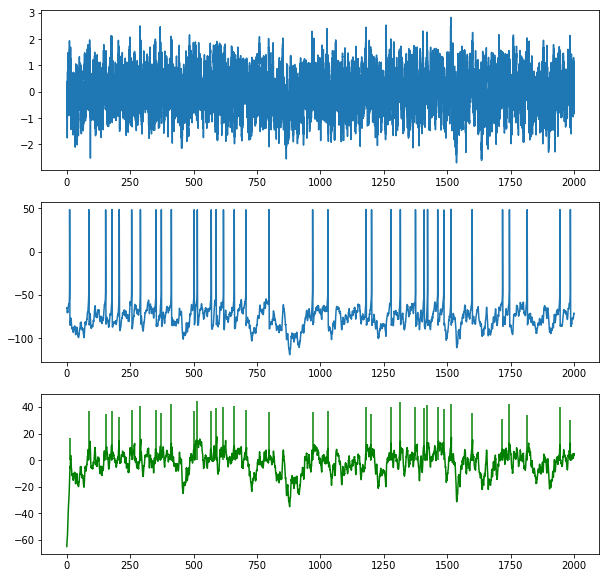

In [25]:
fig, ax = plt.subplots(nrows=3, figsize=(10,10))
ax[0].plot(t0[:d]/ms, inp_cur1[:d]);
ax[1].plot(t0[:d]/ms, voltage1[:d]);
ax[2].plot(t0[:d]/ms, v[:d]/mV, 'g')
ax[2].vlines(t, (v[np.int_(np.round(t/dt*ms))]/mV+30), np.zeros_like(t), 'g');
